In [3]:
from captcha.image import ImageCaptcha
import numpy as np

VOCAB = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
CAPTCHA_LENGTH = 4
VOCAB_LENGTH = len(VOCAB)

def generate_captcha(captcha_text):
    '''
    get captcha text
    return np array of captcha image
    '''
    image = ImageCaptcha()
    captcha = image.generate(captcha_text)
    captcha_image = Image.open(captcha)
#     captcha_image = image_deal(captcha_image)
    a = np.array(captcha_image)
    
    a_0 = list(a[:,:,0])
    a_1 = list(a[:,:,1])
    a_2 = list(a[:,:,2])
    a_ = []
    a_.append(a_0)
    a_.append(a_1)
    a_.append(a_2)
    a_ = np.array(a_)
    return a_

def text2vec(text):
    '''
    text to vector
    :param text: source text
    :return: np array
    '''
    if len(text) > CAPTCHA_LENGTH:
        return False
    
    vector = np.zeros(CAPTCHA_LENGTH * VOCAB_LENGTH)
    
    for i, c in enumerate(text):
        index = i * VOCAB_LENGTH + VOCAB.index(c)
        vector[index] = 1
    return vector

def vec2text(vector):
    '''
    vector to text
    :param text: source vector
    :return: text'''
    if len(vector) != 40:
        return False
    
    if not isinstance(vector, np.ndarray):
        vector = np.asarray(vector)
    
    text = ''
    
    for i in range(0,4):
        text += VOCAB[np.argmax(vector[i*10:(i+1)*10])]
    
    return text

t = '0234'
print(vec2text(text2vec(t)))

0234


In [4]:
import random
from os.path import join, exists
import pickle
import numpy as np
from os import makedirs

DATA_LENGTH = 1000
DATA_PATH = 'data_test'

def get_random_text():
    text = ''
    for i in range(CAPTCHA_LENGTH):
        text += random.choice(VOCAB)
    return text

def generate_data():
    print('Generating Data...')
    data_x, data_y = [], []

    # generate data x and y
    for i in range(DATA_LENGTH):
        text = get_random_text()
        # get captcha array
        captcha_array = generate_captcha(text)
#         # get vector
#         vector = text2vec(text)
        vector = [int(i) for i in text]
        print(vector, text)
        data_x.append(captcha_array)
        data_y.append(vector)

    # write data to pickle
    if not exists(DATA_PATH):
        makedirs(DATA_PATH)

    x = np.asarray(data_x, np.float32)
    y = np.asarray(data_y, np.float32)
    with open(join(DATA_PATH, 'data.pkl'), 'wb') as f:
        pickle.dump(x, f)
        pickle.dump(y, f)
        

generate_data()
with open(join(DATA_PATH,'data.pkl'), 'rb') as f:
    data_x = pickle.load(f)
    data_y = pickle.load(f)
print(data_y)

Generating Data...
[4, 9, 0, 5] 4905
[2, 9, 2, 4] 2924
[8, 5, 1, 8] 8518
[1, 4, 3, 3] 1433
[2, 1, 0, 2] 2102
[2, 8, 8, 3] 2883
[5, 5, 1, 3] 5513
[9, 6, 8, 3] 9683
[0, 8, 5, 8] 0858
[2, 3, 5, 0] 2350
[5, 3, 4, 0] 5340
[9, 0, 3, 9] 9039
[0, 7, 0, 6] 0706
[9, 0, 6, 8] 9068
[8, 0, 3, 8] 8038
[0, 7, 7, 6] 0776
[4, 8, 3, 3] 4833
[5, 2, 7, 2] 5272
[6, 2, 2, 9] 6229
[0, 1, 1, 5] 0115
[1, 0, 1, 8] 1018
[0, 7, 1, 2] 0712
[9, 2, 2, 1] 9221
[0, 0, 9, 7] 0097
[6, 7, 3, 9] 6739
[1, 6, 9, 0] 1690
[2, 9, 4, 5] 2945
[0, 1, 9, 8] 0198
[7, 9, 3, 8] 7938
[7, 4, 5, 5] 7455
[6, 2, 7, 5] 6275
[0, 4, 2, 5] 0425
[3, 1, 2, 8] 3128
[0, 8, 8, 4] 0884
[6, 6, 3, 8] 6638
[7, 5, 4, 1] 7541
[5, 9, 5, 0] 5950
[2, 3, 2, 2] 2322
[4, 3, 5, 5] 4355
[5, 8, 2, 6] 5826
[5, 5, 4, 3] 5543
[3, 7, 5, 4] 3754
[6, 3, 6, 0] 6360
[3, 1, 1, 8] 3118
[4, 5, 3, 6] 4536
[4, 6, 0, 4] 4604
[4, 2, 5, 8] 4258
[0, 5, 5, 1] 0551
[9, 9, 5, 7] 9957
[7, 5, 7, 6] 7576
[3, 0, 9, 7] 3097
[7, 8, 2, 1] 7821
[6, 7, 3, 9] 6739
[7, 3, 3, 3] 7333
[8, 2, 3,

[1, 7, 2, 2] 1722
[5, 8, 9, 0] 5890
[7, 8, 5, 3] 7853
[2, 7, 0, 4] 2704
[5, 8, 8, 6] 5886
[1, 6, 2, 5] 1625
[7, 5, 6, 1] 7561
[2, 1, 9, 4] 2194
[9, 7, 0, 4] 9704
[8, 4, 0, 2] 8402
[9, 7, 5, 8] 9758
[2, 6, 3, 5] 2635
[0, 4, 4, 6] 0446
[3, 9, 8, 0] 3980
[8, 6, 0, 0] 8600
[2, 3, 4, 5] 2345
[6, 3, 3, 4] 6334
[8, 5, 3, 6] 8536
[8, 6, 2, 5] 8625
[7, 2, 5, 0] 7250
[2, 1, 9, 6] 2196
[4, 6, 5, 2] 4652
[0, 0, 6, 6] 0066
[1, 7, 0, 5] 1705
[0, 0, 0, 0] 0000
[8, 3, 7, 7] 8377
[8, 8, 1, 8] 8818
[3, 8, 4, 4] 3844
[4, 7, 5, 1] 4751
[6, 1, 8, 6] 6186
[7, 5, 2, 5] 7525
[7, 4, 2, 3] 7423
[8, 1, 9, 9] 8199
[3, 0, 5, 8] 3058
[8, 4, 7, 2] 8472
[2, 7, 2, 1] 2721
[7, 3, 1, 6] 7316
[2, 8, 5, 9] 2859
[4, 8, 8, 4] 4884
[1, 3, 6, 6] 1366
[8, 3, 4, 1] 8341
[8, 9, 3, 9] 8939
[4, 3, 6, 8] 4368
[8, 2, 5, 9] 8259
[5, 8, 7, 1] 5871
[7, 7, 8, 6] 7786
[1, 0, 5, 0] 1050
[7, 0, 5, 2] 7052
[7, 5, 1, 9] 7519
[0, 9, 6, 9] 0969
[5, 6, 3, 2] 5632
[3, 5, 2, 5] 3525
[9, 7, 5, 8] 9758
[6, 0, 4, 1] 6041
[8, 9, 9, 1] 8991
[1, 2, 2, 

[8, 9, 8, 7] 8987
[6, 6, 6, 6] 6666
[5, 0, 8, 5] 5085
[7, 1, 2, 5] 7125
[2, 8, 5, 4] 2854
[2, 2, 2, 5] 2225
[1, 4, 7, 2] 1472
[3, 3, 8, 5] 3385
[1, 7, 7, 9] 1779
[0, 9, 0, 2] 0902
[9, 5, 0, 3] 9503
[3, 4, 0, 7] 3407
[4, 4, 9, 0] 4490
[2, 6, 8, 2] 2682
[9, 0, 0, 2] 9002
[3, 4, 8, 8] 3488
[8, 7, 7, 6] 8776
[7, 3, 7, 8] 7378
[1, 7, 1, 4] 1714
[0, 9, 2, 8] 0928
[7, 6, 3, 5] 7635
[8, 7, 7, 8] 8778
[2, 5, 6, 4] 2564
[4, 7, 4, 8] 4748
[1, 0, 2, 8] 1028
[8, 2, 6, 3] 8263
[4, 9, 7, 5] 4975
[2, 3, 6, 1] 2361
[6, 4, 1, 7] 6417
[5, 9, 7, 5] 5975
[4, 7, 9, 9] 4799
[5, 0, 1, 2] 5012
[5, 8, 3, 3] 5833
[6, 4, 5, 3] 6453
[0, 8, 6, 3] 0863
[3, 9, 4, 9] 3949
[2, 0, 7, 3] 2073
[7, 5, 3, 3] 7533
[2, 5, 8, 3] 2583
[5, 1, 5, 4] 5154
[7, 9, 0, 2] 7902
[9, 3, 5, 1] 9351
[2, 5, 4, 1] 2541
[9, 3, 7, 6] 9376
[0, 9, 6, 6] 0966
[4, 6, 7, 0] 4670
[0, 5, 8, 7] 0587
[7, 2, 4, 2] 7242
[0, 3, 4, 2] 0342
[0, 2, 2, 2] 0222
[3, 9, 6, 1] 3961
[2, 5, 5, 7] 2557
[5, 8, 6, 2] 5862
[8, 7, 3, 6] 8736
[4, 7, 2, 2] 4722
[5, 8, 8, 

In [27]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable 
import torch.optim as optim
import torchvision.models as models
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
import matplotlib.pyplot as plt
from PIL import Image
#import pandas as pd
import numpy as np
import os
import copy, time


BATCH_SIZE = 16
EPOCH = 15


def data_tf(x):
    x = np.array(x, dtype='float32') / 255
    x = (x - 0.5) / 0.5 # 数据预处理，标准化
#     x = x.reshape((-1,)) # 拉平
    x = torch.from_numpy(x)
    return x


class CaptchaDataset(Dataset):
    def __init__(self, x, y, transform=None):
        super(Dataset, self).__init__()
        self.x = x
        self.y = y
        self.transform = transform
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, n):
#         self.x[n] = image_deal(self.x[n])
#         self.y[n] = image_deal(self.y[n])
#         self.x[n] = self.x[n][np.newaxis,:,:]
        self.x[n] = self.transform(self.x[n])
        return self.x[n], torch.from_numpy(self.y[n])

# import random
# from os.path import join, exists
# import pickle
# import numpy as np
# from os import makedirs
# DATA_PATH = 'data_test'

# with open(join(DATA_PATH,'data.pkl'), 'rb') as f:
#     data_x = pickle.load(f)
#     data_y = pickle.load(f)

# print(data_x[1], data_y[1])
data = CaptchaDataset(data_x, data_y, transform=data_tf)

dataloader = DataLoader(data, batch_size=BATCH_SIZE, shuffle=True, num_workers=4, drop_last=True)

dataset_size = len(data)
for i,j in dataloader:
    pass

print(i.shape, i[1], j[1], dataset_size)
print(type(dataloader))

torch.Size([16, 3, 60, 160]) tensor([[[ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         [ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         [ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         ...,
         [ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         [ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         [ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294]],

        [[ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
         ...,
         [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980],
         [ 0.8980,  0.8980,  0.8980,  ...,  0.8980,  0.8980,  0.8980]],

        [[ 0.9294,  0.9294,  0.9294,  ...,  0.9294,  0.9294,  0.9294],
         [ 0.929

In [8]:
# Conv network
class ConvNet(nn.Module):
      
    def __init__(self):
        super(ConvNet, self).__init__()
        self.conv =nn.Sequential(
                    nn.Conv2d(3, 32, kernel_size=4, stride=1, padding=2), # in:(bs,3,60,160)
                    nn.BatchNorm2d(32),
                    nn.LeakyReLU(0.2, inplace=True),     
                    nn.MaxPool2d(kernel_size=2),        # out:(bs,32,30,80)

                    nn.Conv2d(32, 64, kernel_size=4, stride=1, padding=2),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU(0.2, inplace=True),
                    nn.MaxPool2d(kernel_size=2),        # out:(bs,64,15,40)

                    nn.Conv2d(64, 64, kernel_size=3 ,stride=1, padding=1),
                    nn.BatchNorm2d(64),
                    nn.LeakyReLU(0.2, inplace=True),     
                    nn.MaxPool2d(kernel_size=2)         # out:(bs,64,7,20)
                )

        self.fc1 = nn.Linear(64*7*20, 500)
        self.fc2 = nn.Linear(500,40)
      
    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)    # reshape to (batch_size, 64 * 7 * 30)
        output = self.fc1(x)
        output = self.fc2(output)

        return output


# Train the net
class nCrossEntropyLoss(torch.nn.Module):

    def __init__(self, n=4):
        super(nCrossEntropyLoss, self).__init__()
        self.n = n
        self.total_loss = 0
        self.loss = nn.CrossEntropyLoss()

    def forward(self, output, label):
        output_t = output[:,0:10]
        label = Variable(torch.LongTensor(label.data.cpu().numpy())).cuda()
        label_t = label[:,0]

        for i in range(1, self.n):
            output_t = torch.cat((output_t, output[:,10*i:10*i+10]), 0)   # 损失的思路是将一张图平均剪切为4张小图即4个多分类，然后再用多分类交叉熵方损失
            label_t = torch.cat((label_t, label[:,i]), 0)         
            self.total_loss = self.loss(output_t, label_t)

        return self.total_loss


def equal(np1,np2):
      
    n = 0
    for i in range(np1.shape[0]):
        if (np1[i,:]==np2[i,:]).all():
              n += 1 

    return n
      

net = ConvNet().cuda()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
#loss_func = nn.CrossEntropyLoss()
loss_func = nCrossEntropyLoss()

best_model_wts = copy.deepcopy(net.state_dict())  
best_acc = 0.0   

since = time.time()
for epoch in range(EPOCH):
      
    running_loss=0.0
    running_corrects=0

    for step,(inputs,label) in enumerate(dataloader):

        pred = torch.LongTensor(BATCH_SIZE,1).zero_()
        inputs = Variable(inputs).cuda()   # (bs, 3, 60, 240)
        label = Variable(label).cuda()   # (bs, 4)

        optimizer.zero_grad() 

        output = net(inputs)   # (bs, 40)
        loss = loss_func(output, label) 

        for i in range(4):
            pre = F.log_softmax(output[:,10*i:10*i+10], dim=1)  # (bs, 10)
            pred = torch.cat((pred, pre.data.max(1, keepdim=True)[1].cpu()), dim=1)    # 

        loss.backward()
        optimizer.step()

        running_loss += loss.data[0] * inputs.size()[0]
        running_corrects += equal(pred.numpy()[:,1:], label.data.cpu().numpy().astype(int))

    epoch_loss = running_loss / dataset_size
    epoch_acc  = running_corrects / dataset_size

    if  epoch_acc > best_acc:   
        best_acc = epoch_acc
        best_model_wts = copy.deepcopy(net.state_dict())  

#     if epoch == EPOCH-1:
#         torch.save(best_model_wts, file_path+'/best_model_wts.pkl')

    print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
               time_elapsed // 60, time_elapsed % 60))
    print('Train Loss:{:.4f} Acc: {:.4f}'.format(epoch_loss, epoch_acc))

/home/lsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:99: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number



Training complete in 0m 1s
Train Loss:3.2399 Acc: 0.0000

Training complete in 0m 2s
Train Loss:2.0495 Acc: 0.0040

Training complete in 0m 3s
Train Loss:1.4253 Acc: 0.0670

Training complete in 0m 4s
Train Loss:0.9268 Acc: 0.2470

Training complete in 0m 6s
Train Loss:0.5709 Acc: 0.4480

Training complete in 0m 7s
Train Loss:0.3970 Acc: 0.5850

Training complete in 0m 8s
Train Loss:0.2397 Acc: 0.7380

Training complete in 0m 9s
Train Loss:0.1588 Acc: 0.8230

Training complete in 0m 10s
Train Loss:0.0981 Acc: 0.8850

Training complete in 0m 11s
Train Loss:0.0475 Acc: 0.9530

Training complete in 0m 12s
Train Loss:0.0254 Acc: 0.9710

Training complete in 0m 13s
Train Loss:0.0181 Acc: 0.9760

Training complete in 0m 15s
Train Loss:0.0158 Acc: 0.9730

Training complete in 0m 16s
Train Loss:0.0299 Acc: 0.9580

Training complete in 0m 17s
Train Loss:0.0691 Acc: 0.9150


In [9]:
#############   generate data   ################
from captcha.image import ImageCaptcha
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def get_random_text():
    text = ''
    for i in range(CAPTCHA_LENGTH):
        text += random.choice(VOCAB)
    return text

def generate_test_captcha(captcha_text):
    '''
    get captcha text
    return np array of captcha image
    '''
    image = ImageCaptcha()
    captcha = image.generate(captcha_text)
    captcha_image = Image.open(captcha)
#     captcha_image = image_deal(captcha_image)
    a = np.array(captcha_image)
    
    a_0 = list(a[:,:,0])
    a_1 = list(a[:,:,1])
    a_2 = list(a[:,:,2])
    a_ = []
    a_.append(a_0)
    a_.append(a_1)
    a_.append(a_2)
    a_ = np.array(a_)
    return captcha_image, a_

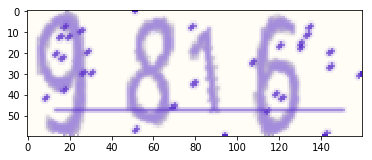

In [23]:
test_text = get_random_text()
test_image, test_array = generate_test_captcha(test_text)
plt.figure()
plt.imshow(test_image)

In [24]:
test_array = test_array.astype(float)
test_variable = Variable(torch.Tensor(test_array))
test_variable.unsqueeze_(0)
test_variable = Variable(test_variable).cuda()   
out = net(test_variable)
# print(type(out), type(out.data.numpy()))

out = out.squeeze_(0).data.cpu().numpy()  
test_net = vec2text(out)
out, out.shape, test_net

(array([ -2.568976  ,  -1.1523958 ,  -1.4534411 ,   3.5384727 ,
         -3.1205943 ,   0.02204569, -12.195097  ,   1.5023757 ,
         -1.8414735 ,  11.021615  ,   5.8023252 ,  -9.16124   ,
         -1.8113482 ,  -0.47656533,  -2.653319  ,   2.447296  ,
          1.3614874 ,  -6.539166  ,   8.508844  ,   1.3963227 ,
          0.25135556,   4.3187404 ,   0.36899137,  -3.6895192 ,
         -2.1541305 ,  -0.9918225 ,   1.2513535 ,   4.099376  ,
          4.0901704 ,  -2.571768  ,  -2.8798032 ,  -3.2841465 ,
         -3.90768   ,   1.4319547 ,  -2.671162  ,  11.975193  ,
         13.670847  ,  -4.3487206 ,   2.9242337 ,  -7.2892427 ],
       dtype=float32), (40,), '9816')